In [2]:
import ccxt
import pandas as pd
from datetime import datetime

# Initialize exchanges
binance = ccxt.binance({'enableRateLimit': True})
coinbase = ccxt.coinbase({'enableRateLimit': True})

pair = 'BTC/USDT'

# Fetch ticker data
ticker_binance = binance.fetch_ticker(pair)
ticker_coinbase = coinbase.fetch_ticker(pair)

# Create DataFrames
df_binance = pd.DataFrame([{
    'exchange': 'binance',
    'timestamp': pd.to_datetime(ticker_binance['timestamp'], unit='ms', utc=True),
    'price': ticker_binance['last']
}])

df_coinbase = pd.DataFrame([{
    'exchange': 'coinbase',
    'timestamp': pd.to_datetime(ticker_coinbase['timestamp'], unit='ms', utc=True),
    'price': ticker_coinbase['last']
}])

display(df_binance)
display(df_coinbase)


,exchange,timestamp,price
0,binance,2025-10-10 13:17:08.013000+00:00,121796.51


,exchange,timestamp,price
0,coinbase,2025-10-10 13:17:11.293000+00:00,121813.39


In [3]:
# Combine into one table
df = pd.concat([df_binance, df_coinbase], ignore_index=True)

# Pivot the data so each exchange has its own column
aligned = df.pivot_table(index='timestamp', columns='exchange', values='price')

aligned


exchange,binance,coinbase
timestamp,,
2025-10-10 13:17:08.013000+00:00,121796.51,NaN
2025-10-10 13:17:11.293000+00:00,NaN,121813.39


In [4]:
aligned['spread'] = aligned['coinbase'] - aligned['binance']
aligned['spread_%'] = (aligned['spread'] / aligned.mean(axis=1)) * 100
aligned


exchange,binance,coinbase,spread,spread_%
timestamp,,,,
2025-10-10 13:17:08.013000+00:00,121796.51,NaN,NaN,NaN
2025-10-10 13:17:11.293000+00:00,NaN,121813.39,NaN,NaN


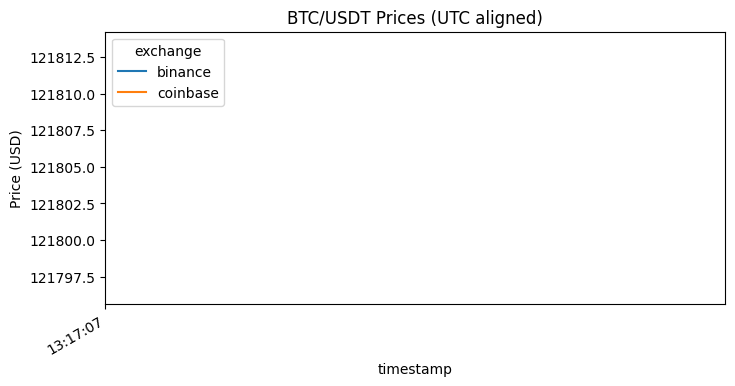

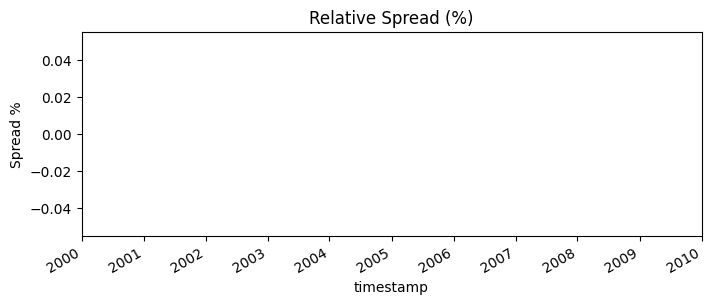

In [5]:
import matplotlib.pyplot as plt

aligned[['binance', 'coinbase']].plot(title='BTC/USDT Prices (UTC aligned)', figsize=(8,4))
plt.ylabel('Price (USD)')
plt.show()

aligned['spread_%'].plot(title='Relative Spread (%)', figsize=(8,3))
plt.ylabel('Spread %')
plt.show()


In [6]:
import time

records = []

for _ in range(5):
    tb = binance.fetch_ticker(pair)
    tc = coinbase.fetch_ticker(pair)
    now = datetime.utcnow()

    records.append({
        'time': now,
        'binance': tb['last'],
        'coinbase': tc['last'],
        'spread': tc['last'] - tb['last']
    })
    
    print(f"{now} | Spread: {tc['last'] - tb['last']:.2f}")
    time.sleep(10)  # wait 10 seconds

df_ticks = pd.DataFrame(records)
df_ticks


C:\Users\akhen\AppData\Local\Temp\ipykernel_14024\2534367775.py:8: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow()


2025-10-10 13:17:16.323420 | Spread: 6.61
2025-10-10 13:17:27.260066 | Spread: 6.78
2025-10-10 13:17:37.871656 | Spread: 8.29
2025-10-10 13:17:48.485276 | Spread: 8.29
2025-10-10 13:17:59.480237 | Spread: 16.30


,time,binance,coinbase,spread
0,2025-10-10 13:17:16.323420,121800.85,121807.46,6.61
1,2025-10-10 13:17:27.260066,121770.05,121776.83,6.78
2,2025-10-10 13:17:37.871656,121754.33,121762.62,8.29
3,2025-10-10 13:17:48.485276,121754.33,121762.62,8.29
4,2025-10-10 13:17:59.480237,121763.03,121779.33,16.30
